# Topics

## 1. Image Manipulation



## On your home machines, do
\> pip install scikit-image

## An image in Python is no more or less than a 2D numpy array!

<type 'numpy.ndarray'> (512, 512, 4) uint8


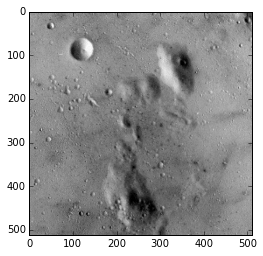

In [2]:
%matplotlib inline
'''

A RGBA images -- with four channels.  The last one, the "alpha-channel", allows for transparency, 

'''


import matplotlib.image as mpimg #to read image
import matplotlib.pyplot as plt

moon_im=mpimg.imread('moon.gif') #to read image
print type(moon_im), moon_im.shape, moon_im.dtype
plt.imshow(moon_im)

plt.show()

[[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]


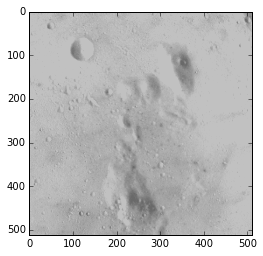

In [7]:
from copy import copy
print moon_im[:5,:5, 3]
moon_copy = copy(moon_im)
moon_copy[:,:,3] = 150 #<transparency
                        #changed 512 by 512 by 

plt.imshow(moon_copy)
plt.show()

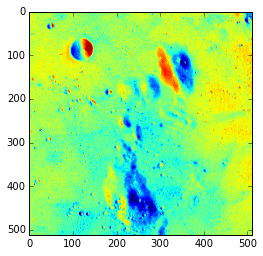

In [8]:
'''
Let's pick one channel, say R

intensity map

Shown in false color

'''

moon = moon_im[:, :, 0]
plt.imshow(moon) #python's default for greyscale
plt.show()

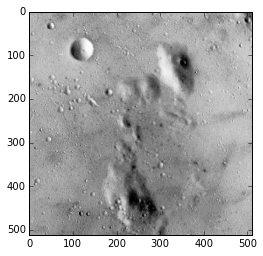

In [9]:
import matplotlib.cm as cm #coloring options
plt.imshow(moon, cmap = cm.Greys_r) #256 shades of grey
plt.show()


<type 'numpy.ndarray'> (512, 512) uint8


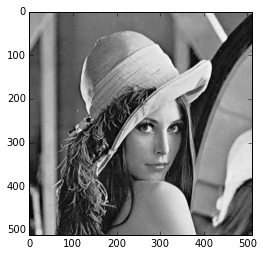

In [21]:
lena = mpimg.imread('lena512.jpg')
print type(lena), lena.shape, lena.dtype
plt.imshow(lena,  cmap = cm.Greys_r)
plt.show()

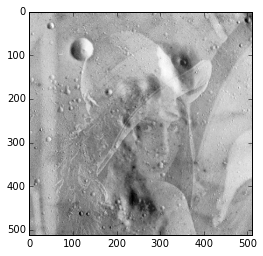

In [11]:
'''Blending'''
# To avoid saturation (just as for sound)
fac = 0.25

blend = fac*lena + (1-fac)*moon
plt.imshow(blend,  cmap = cm.Greys_r)
plt.show()

In [16]:
import numpy as np
x = np.arange(10)
print x
x_new = np.roll(x, 9) #takes the end; sticks @ beginning
print x_new

[0 1 2 3 4 5 6 7 8 9]
[1 2 3 4 5 6 7 8 9 0]


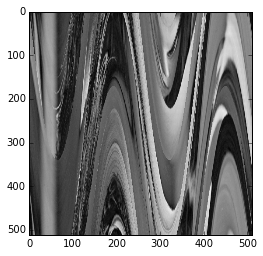

In [19]:
A = lena.shape[0] / 3.0
w = 2.0 / lena.shape[1]

shift = lambda x: A * np.sin(2.0*np.pi*x*w)

for i in range(lena.shape[0]):
    lena[:,i] = np.roll(lena[:,i], int(shift(i)))

plt.imshow(lena, cmap=plt.cm.gray)
plt.show()

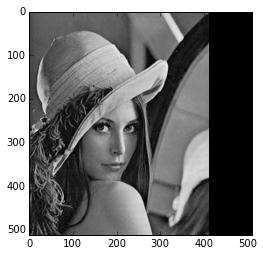

In [22]:
from skimage.transform import warp 
#in order to use warp, define how you want it warped
def shift_left(xy):
    xy[:, 0] += 100
    return xy


lena_shift = warp(lena, shift_left)
plt.imshow(lena_shift, cmap=plt.cm.gray)
plt.show()

## Breakout: Simulate Fish Eye Lens:
## r = 0.8 * exp(r^(1/2.1) / 1.8)
source: http://wiki.panotools.org/Fisheye_Projection